Basic Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the dataset

In [3]:
data = pd.read_excel("insurance.xlsx")

data.head(7)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
5,31,female,25.7,0,no,southeast,3756.62
6,46,female,33.4,1,no,southeast,8240.59


In [4]:
data.shape

(1338, 7)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Check the feature correlations

<Axes: >

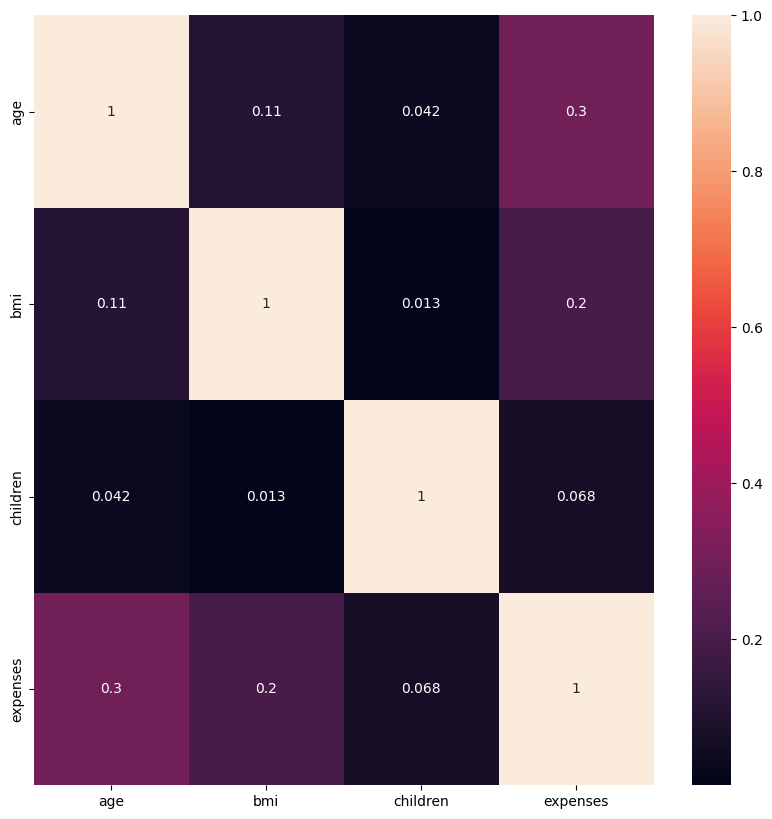

In [7]:
fig, ax = plt.subplots(figsize=(10,10))

corr = data.select_dtypes('number').corr()
sns.heatmap(corr , annot = True , ax=ax)

Label Encode Object Types

In [8]:
d_types = dict(data.dtypes)
for name , type_ in d_types.items():
    if str(type_) == 'object':
        print(f"<======== {name} ===========>")
        print(data[name].value_counts())
        print()

<======== sex ===========>
sex
male      676
female    662
Name: count, dtype: int64

<======== smoker ===========>
smoker
no     1064
yes     274
Name: count, dtype: int64

<======== region ===========>
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64



In [10]:
from sklearn.preprocessing import LabelEncoder

for name , type_ in d_types.items():
    if str(type_) == 'object':
        Le = LabelEncoder()
        data[name] = Le.fit_transform(data[name])

Check info after Label Encoding

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [14]:
print (data.iloc[:,:-1].values)
print ('='*50)
print (data.iloc[:,:-1])

[[19.   0.  27.9  0.   1.   3. ]
 [18.   1.  33.8  1.   0.   2. ]
 [28.   1.  33.   3.   0.   2. ]
 ...
 [18.   0.  36.9  0.   0.   2. ]
 [21.   0.  25.8  0.   0.   3. ]
 [61.   0.  29.1  0.   1.   1. ]]
      age  sex   bmi  children  smoker  region
0      19    0  27.9         0       1       3
1      18    1  33.8         1       0       2
2      28    1  33.0         3       0       2
3      33    1  22.7         0       0       1
4      32    1  28.9         0       0       1
...   ...  ...   ...       ...     ...     ...
1333   50    1  31.0         3       0       1
1334   18    0  31.9         0       0       0
1335   18    0  36.9         0       0       2
1336   21    0  25.8         0       0       3
1337   61    0  29.1         0       1       1

[1338 rows x 6 columns]


In [70]:
X = data.iloc[:,:-1].values
Y = data.iloc[:,-1].values

In [71]:
X.shape , Y.shape

((1338, 6), (1338,))

In [72]:
from sklearn.model_selection import train_test_split 

Xtrain , Xtest , Ytrain , Ytest = train_test_split(X , Y , test_size = 0.2 , random_state = 4)

In [73]:
from sklearn.preprocessing import StandardScaler

Scaler = StandardScaler()
Xtrain = Scaler.fit_transform(Xtrain)
Xtest = Scaler.transform(Xtest)

In [74]:
Xtrain.shape , Xtest.shape

((1070, 6), (268, 6))

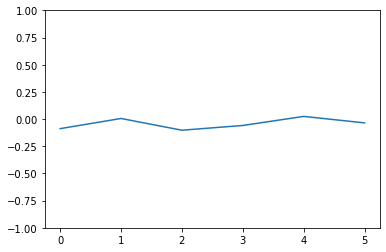

In [75]:
# check whether data is standardized or not 
# mean should be 1 

plt.ylim(-1,1)

means = []
for i in range(X.shape[1]):
    means.append(np.mean(Xtest[:,i]))
plt.plot(means , scaley=False)

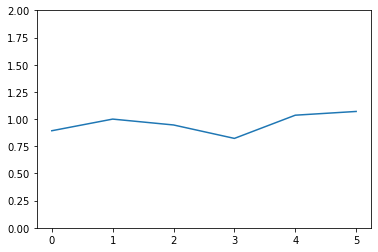

In [76]:
# Check variances 

plt.ylim(0,2)

vars = []
for i in range(X.shape[1]):
    vars.append(np.var(Xtest[:,i]))
plt.plot(vars)

In [77]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(Xtrain , Ytrain)

LinearRegression()

In [78]:
model.coef_

array([3732.1576253 , -180.9623548 , 1947.05093741,  491.85992684,
       9879.91019114, -493.7954718 ])

In [79]:
model.intercept_

13479.206925233628

In [80]:
# Y = W.X + c
model.coef_.dot(Xtest[10,:]) + model.intercept_

3610.235629635641

In [81]:
model.predict(Xtest[10,:].reshape(1,-1))

array([3610.23562964])